In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import *
from IPython.display import display
from ipywidgets import FloatProgress  
import time
import ipywidgets as widgets
widgets.IntSlider()
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
####data pre-processing

data = pd.read_csv("Mobile_Amazon.csv")
data = data.dropna(axis = 0)
data = data[["Reviews","Rating"]]
data_pos = data[data["Rating"].isin([4,5])]
data_neg = data[data["Rating"].isin([1,2])]
data_neu = data[data["Rating"].isin([3])]
data_filtered = pd.concat([data_pos[:20000],data_neg[:20000],data_neu[:20000]])
data_filtered["r"] = 1
data_filtered["r"][data_filtered["Rating"].isin([1,2])] = 0

In [3]:
####Trainning and Test Data 

X_train_data,x_test_data,Y_train_data,y_test_data=train_test_split(data_filtered["Reviews"],data_filtered["r"],test_size=0.2)

In [4]:
####Using Count Vectorization(Transforms text into a sparse matrix of n-gram counts)

count_vector=CountVectorizer(stop_words="english")
count_vector.fit(X_train_data)
X_train_data_new=count_vector.transform(X_train_data)
x_test_data_new=count_vector.transform(x_test_data)

In [5]:
####Widgets In-Use

start_button=Button(description="Start System",button_style='danger') 
drop_down_choice=widgets.Dropdown(options={'Initiate _model':1,'Analyzing_model':2,'Predict rating for new review':3},value=1)
choose_button=Button(description="Click",button_style='danger')    
drop_down=widgets.Dropdown(options={'Logistic Regression': 1},value=1)
rad_button=widgets.RadioButtons(options=['Accuracy', 'ROC Curve', 'Precision,Recall and F-Measure',],value='Accuracy',disabled=False)
button= widgets.Button(description="Submit",button_style='info')
Inp_text = widgets.Text(description="", width=20000)   
button_rating= widgets.Button(description="Find Rating",button_style='info')
fp = FloatProgress(min=0,max=100,description="Calculating")  
Out_text=widgets.Text()

In [6]:
####Logistic Regression 

prediction = dict()
def log_reg():
    print("\n\nLogistic Regression Classifier")
    print("Please be patient. This may take some time.")
    lr_model = LogisticRegression()
    
    ##Trainning Model
    lr_model.fit(X_train_data_new,Y_train_data)
    
    ##Test Model
    prediction['LogisticRegression'] = lr_model.predict(x_test_data_new)
    
    ##Calculating Model Accuracy
    if rad_button.value=='Accuracy':
        print("Accuracy = "+str(accuracy_score(y_test_data,prediction['LogisticRegression'])))
        
    ##Generating ROC Curve     
    if rad_button.value=='ROC Curve':
        false_positive, true_positive,_= roc_curve(y_test_data,prediction['LogisticRegression'])
        plt.title('Receiver Operating Characteristic')
        plt.plot(false_positive, true_positive)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive  Rate')
        plt.show()
        
    ##Calculating Precision, Recall and F-Measure
    if rad_button.value=='Precision,Recall and F-Measure':
        print(classification_report(y_test_data, prediction['LogisticRegression'], target_names = ["Good", "Bad", "Neutral"]))

In [7]:
def analyzing_model():
    print("\n\nPlease wait. This may take a few minutes")
    print("\nAnalyzing Logistic Regression")
    lr_model = LogisticRegression()
    lr_model.fit(X_train_data_new,Y_train_data)
    prediction['LogisticRegression'] = lr_model.predict(x_test_data_new)
    print("\n\nCalculating Accuracy of the model.\n\n")
    accuracy_result = {}
    
    #Model Accuracy Table
    for k,v in prediction.items():
        accuracy_result[k] = accuracy_score(y_test_data,v)
    accuracy_table=pd.DataFrame(list(accuracy_result.items()), columns=["Model","Accuracy"])
    print(accuracy_table)

    #Bar chart for displaying accuracies of models
    plt.figure(figsize= (10,8))
    sns.barplot(x = "Model", y = "Accuracy", data = accuracy_table)
    plt.title("Model accuracy")
    plt.xticks(rotation = 90)

In [8]:
####predict rating of the review on the Go

def predict_rating():
    print("Customer Review")
    
    display(Inp_text)
    
    display(button_rating)
    print ("Rating")
   
    display(Out_text)
    def handle_submit(sender):
        display(fp)
        #Predicting Rating of the Input Review
        ess_model = RandomForestClassifier()
        ess_model.fit(X_train_data_new,Y_train_data)                             
        review=Inp_text.value
        new_test_transform = count_vector.transform([review])        

        for i in range(100):  
            fp.value += 1
            time.sleep(0.1)
        if ess_model.predict(new_test_transform):
            Out_text.value="Good"
        else :
            Out_text.value="Bad"
    Inp_text.on_submit(handle_submit)
    button_rating.on_click(handle_submit)

In [9]:
####System GUI Code       

def initiate_model():
    print("Classifier Model")    
    display(drop_down)
    display(rad_button)
    display(button)

    def handle_submit(sender):
        if drop_down.value==1:
            log_reg()
    button.on_click(handle_submit)

In [10]:
####Run-Off

def actions():
    
    display(drop_down_choice)    
    display(choose_button)
    def handle_choice(sender):
        if drop_down_choice.value==1:
            initiate_model()
        if drop_down_choice.value==2:
            analyzing_model()
        if drop_down_choice.value==3:
            predict_rating()
    choose_button.on_click(handle_choice)

Sentimenatl Analysis of Customer on different Products


Button(button_style='danger', description='Start System', style=ButtonStyle())

Dropdown(options={'Initiate _model': 1, 'Analyzing_model': 2, 'Predict rating for new review': 3}, value=1)

Button(button_style='danger', description='Click', style=ButtonStyle())

Classifier Model


Dropdown(options={'Logistic Regression': 1}, value=1)

RadioButtons(options=('Accuracy', 'ROC Curve', 'Precision,Recall and F-Measure'), value='Accuracy')

Button(button_style='info', description='Submit', style=ButtonStyle())



Logistic Regression Classifier
Please be patient. This may take some time.
Accuracy = 0.9058333333333334


Please wait. This may take a few minutes

Analyzing Logistic Regression


Calculating Accuracy of the model.


                Model  Accuracy
0  LogisticRegression  0.905833


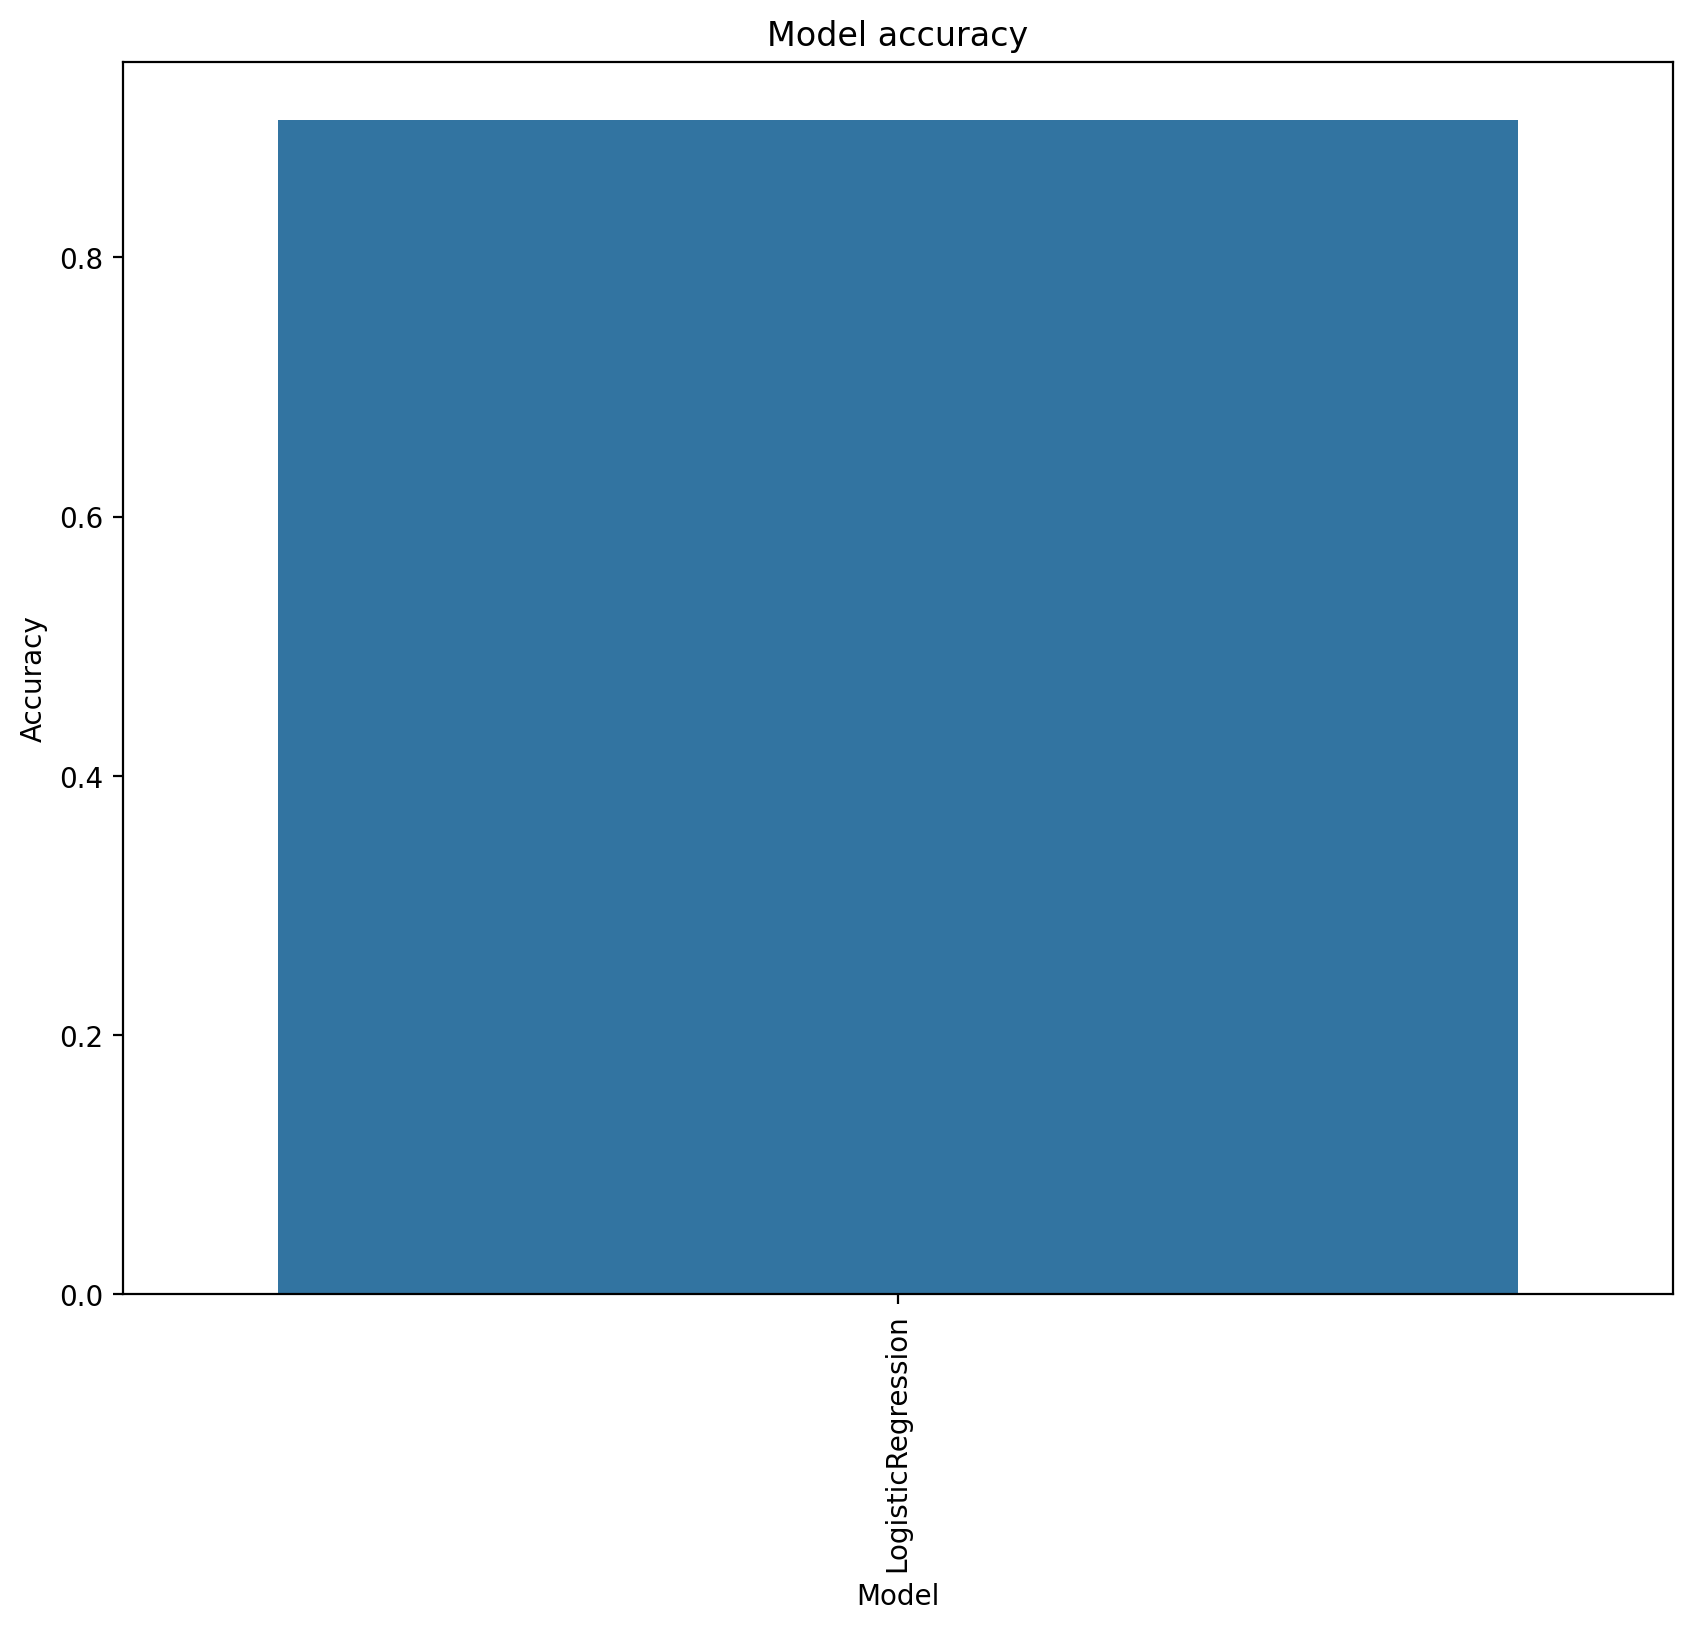

Customer Review


Text(value='')

Button(button_style='info', description='Find Rating', style=ButtonStyle())

Rating


Text(value='')

FloatProgress(value=0.0, description='Calculating')

FloatProgress(value=100.0, description='Calculating')

In [11]:
print("Sentimenatl Analysis of Customer on different Products")
display(start_button)
def loading(sender):
    actions()
start_button.on_click(loading)